<a href="https://colab.research.google.com/github/Grodelek/AI_Laboratoria/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [2]:

mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)
num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.O6OL2F_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.O6OL2F_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
def scale(image, label):
  image = tf.cast(image, tf.float32)
  image /= 255.
  return image, label
scaled_train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

In [4]:

BUFFER_SIZE = 1000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)


In [5]:
BATCH_SIZE = 100
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)
validation_inputs, validation_targets = next(iter(validation_data))
print(validation_inputs.shape, validation_targets.shape)

(6000, 28, 28, 1) (6000,)


In [6]:

input_size = 784
output_size = 10

hidden_layer_size = 50

model = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28,1)),
          tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
          tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
          tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
NUM_EPOCHS = 30
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model.fit(train_data,
          epochs=NUM_EPOCHS,
          callbacks=[early_stopping],
          validation_data=(validation_inputs, validation_targets),
          verbose = 1)


Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7913 - loss: 0.7120 - val_accuracy: 0.9362 - val_loss: 0.2183
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9443 - loss: 0.1908 - val_accuracy: 0.9495 - val_loss: 0.1705
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9559 - loss: 0.1479 - val_accuracy: 0.9552 - val_loss: 0.1538
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9652 - loss: 0.1190 - val_accuracy: 0.9560 - val_loss: 0.1407
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9685 - loss: 0.1041 - val_accuracy: 0.9618 - val_loss: 0.1271
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9740 - loss: 0.0873 - val_accuracy: 0.9597 - val_loss: 0.1290
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9766 - loss: 0.0796 - val_accuracy: 0.9622 - val_loss: 0.1240
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9796 - loss: 0.0689 - val_accurac

In [8]:

test_loss, test_accuracy = model.evaluate(test_data)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step - accuracy: 0.9706 - loss: 0.1084
Test loss: 0.11. Test accuracy: 97.06%


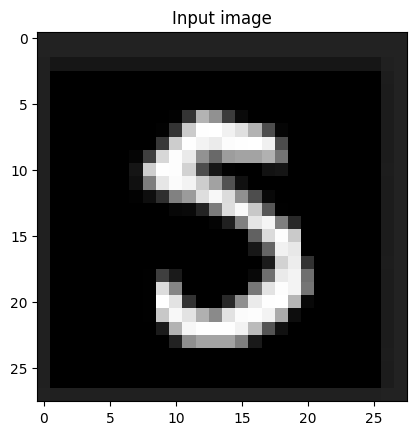

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Model predicted number: 5


In [10]:

image_path = '/content/liczba.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (28, 28))
plt.imshow(img_resized, cmap='gray')
plt.title("Input image")
plt.show()
img_normalized = img_resized.astype('float32') / 255.0
img_reshaped = img_normalized.reshape(1, 28, 28, 1)
prediction = model.predict(img_reshaped)
predicted_label = np.argmax(prediction)
print(f"Model predicted number: {predicted_label}")